# Lab session 3: Data Preprocessing

## Introduction

The aim of this lab is for students to get experience with **Data Preprocessing**, and more specifically with the concepts of **handling missing values**, **handling noisy data**, **data normalisation**, and **data dimensionality reduction**.



## 1. Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using the Pandas read_csv() function and display its first 5 data points.

In [2]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

In [5]:
import numpy as np

data = data.replace('?',np.nan)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

In [6]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(pd.to_numeric(data2).median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20     10
21      7
22      1
23    1.0
24      1
Name: Bare Nuclei, dtype: object


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

In [7]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

Note: Regarding the boxplot:
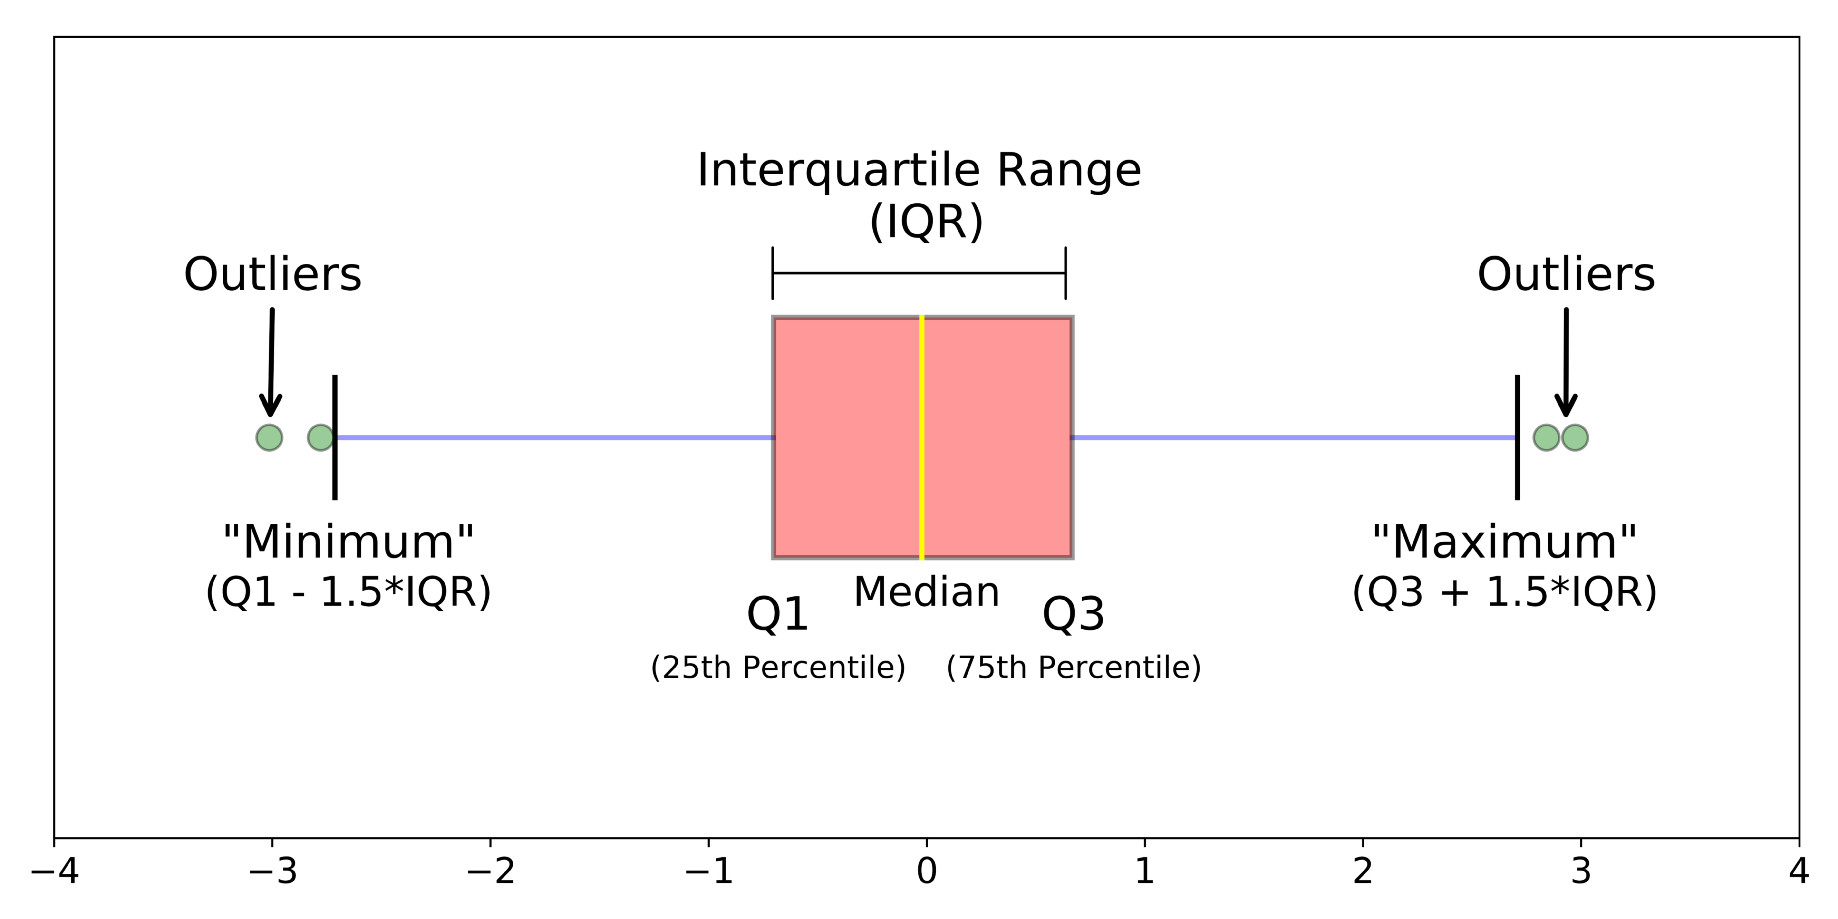

<Axes: >

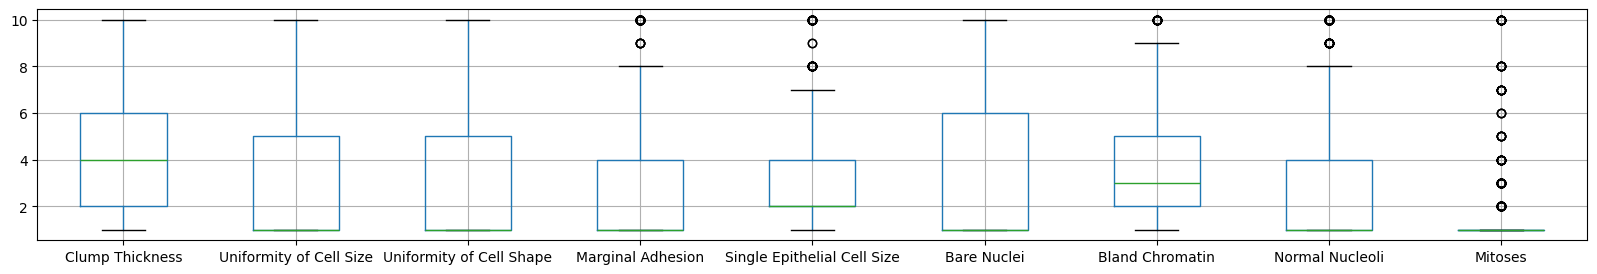

In [8]:
data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).


The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [9]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


The following code shows the results of discarding columns with Z > 3 or Z <= -3.

In [10]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding outlier values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding outlier values = 632


### 1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues. In the following example, we first check for duplicate instances in the breast cancer dataset.

In [11]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

In [12]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data_deduplicated = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data_deduplicated.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## 2. Principal Component Analysis

Principal component analysis (PCA) is a classical method for reducing the number of attributes in the data by projecting the data from its original high-dimensional space into a lower-dimensional space. The new attributes (also known as components) created by PCA have the following properties: (1) they are linear combinations of the original attributes, (2) they are orthogonal (perpendicular) to each other, and (3) they capture the maximum amount of variation in the data.

The example below illustrates the application of PCA to an image dataset. There are 16 images (i.e., RGB -Red Blue Green- files; you can get an idea of what is an image [here](https://levelup.gitconnected.com/pixels-arrays-and-images-ef3f03638fe7)), each of which has a size of 111 x 111 pixels. The example code below will read each image file and convert the RGB image into 111 x 111 x 3 = 36963 feature values. This will create a data matrix of size 16 x 36963. The example code below also shows-plots the images.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    filename = 'C:\\Users\\banta\\Downloads\\Lab03\\pics/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

Using PCA, the data matrix is projected to its first two principal components. The projected values of the original image data are stored in a pandas DataFrame object named projected.

In [17]:
import pandas as pd
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,1592.890482,-6651.306208,burger
2,513.023549,-6334.984664,burger
3,-963.287578,-7207.400919,burger
4,-2165.067760,-9039.420633,burger
5,7842.474694,1063.507708,drink
6,8458.898984,5385.855674,drink
7,11181.807569,5359.143777,drink
8,6831.012945,-1129.658532,drink
9,-7639.865225,5059.997286,pasta
10,704.462718,531.896843,pasta


Finally, we draw a scatter plot to display the projected values. Observe that: all images of burgers are projected to the same region; all images of drinks are projected to the same region; all images of pastas are projected to the same region; however, the images for fried chicken (shown as black squares in the diagram) are harder to discriminate.

In [19]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])



**3. MDS and t-SNE**



The class ``MDS`` from the library ``sklearn`` implements dimensionality reduction through multidimensional scaling. A standardized matrix of observations as the one used to compute the distance matrix in the example above is an appropriate input to the method ``MDS.fit_transform``, which outputs a matrix that contains a two-dimensional point for each observation in the input matrix. A scatter plot can be used to depict this output matrix.

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

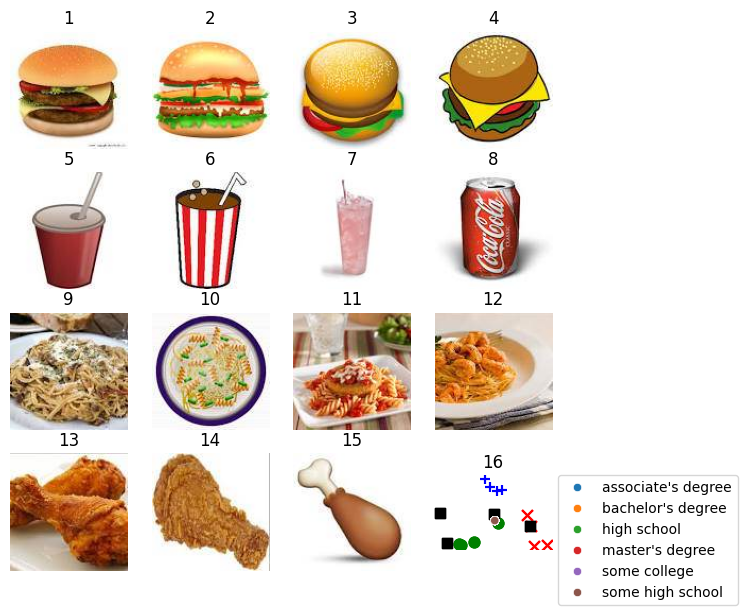

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# DATA LOAD AND PREPROCESSING
df = pd.read_csv('graduation_rate.csv')
df_sorted = df.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = df_sorted['parental level of education']
X = df_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)


# MDS
from sklearn.manifold import MDS

embedding = MDS(n_components=2)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})

sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


The class ``TSNE`` from the library ``sklearn`` implements dimensionality reduction through t-distributed stochastic neighbour embedding (t-SNE). Its interface is analogous to the one provided by the class ``MDS``.

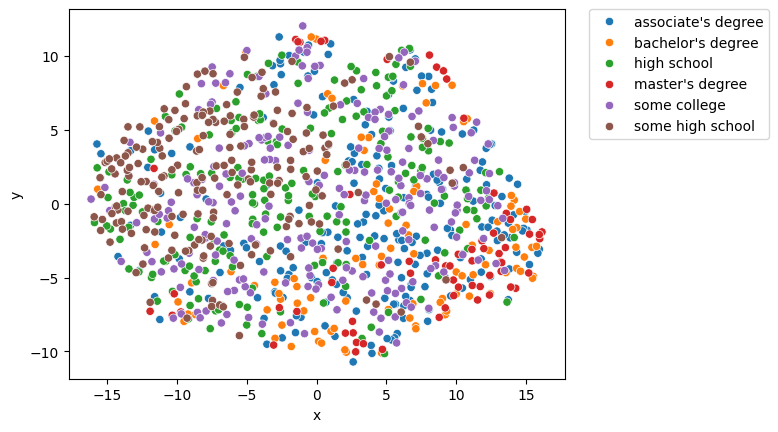

In [21]:
# T-SNE
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, perplexity=100)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})
sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the example below, each point obtained by t-SNE is coloured according to whether the parents of the corresponding student have a higher education degree.

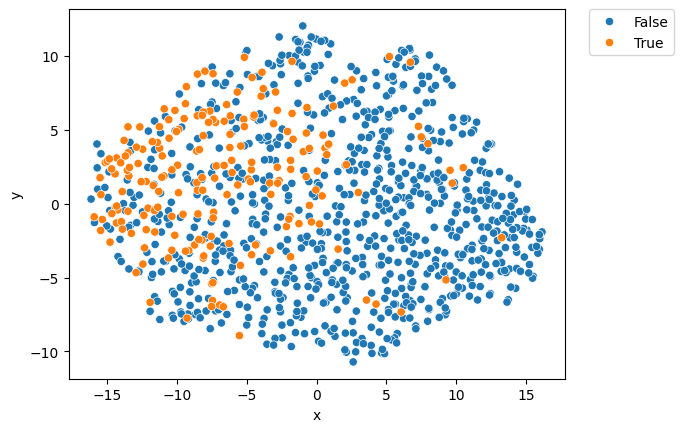

In [22]:
df_projection['parents have degree'] = (df['parental level of education'] > 'some college')
sns.scatterplot(x='x', y='y', hue='parents have degree', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Exercise**

Comparing PCA and t-SNE with a generated classification dataset.

In [25]:
pip install plotly --upgrade

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   -------------- ------------------------- 7.1/19.1 MB 39.6 MB/s eta 0:00:01
   ---------------------------- ----------- 13.4/19.1 MB 35.0 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 33.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
# We use Scikit-Learn’s make_classification function to generate synthetic data
# with 6 features, 2000 samples, and 3 classes.
from sklearn.datasets import make_classification

X, y = make_classification(n_features=6, n_classes=3, n_samples=2000, n_informative=2, random_state=5, n_clusters_per_class=1,)

# We can 3D plot the first three features of the data using the Plotly Express scatter_3d function.
import plotly.express as px
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()


In [36]:
# 1) Apply PCA algorithm on the dataset to return two PCA components.
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(X)

projected_df = pd.DataFrame(projected, columns=['PC1', 'PC2'])
projected_df['Class'] = y

print(projected_df.head())

        PC1       PC2  Class
0 -1.654313 -1.402210      0
1 -0.788012 -0.557741      0
2 -1.613427 -1.032567      2
3 -3.378899  0.249705      2
4 -0.489069  0.405568      1


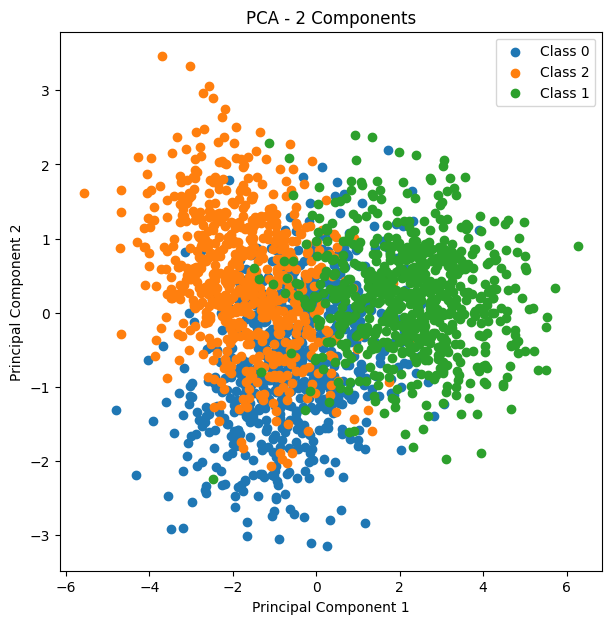

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [30]:
# 2) Visualize the results by displaying two PCA components on a scatter plot.
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for class_label in projected_df['Class'].unique():
    subset = projected_df[projected_df['Class'] == class_label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Class {class_label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - 2 Components')
plt.show()
plt.axis('off')



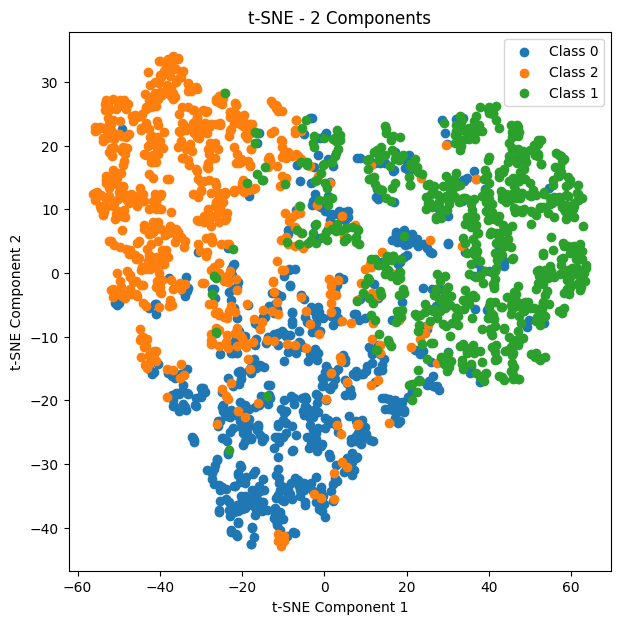

In [39]:
# 3) Apply t-SNE to the dataset to returen two low-dimensional components.
from sklearn.manifold import TSNE

# Apply t-SNE to reduce to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Convert to DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y

# Scatter plot for t-SNE results
plt.figure(figsize=(7, 7))
for class_label in tsne_df['Class'].unique():
    subset = tsne_df[tsne_df['Class'] == class_label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Class {class_label}')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE - 2 Components')
plt.show()

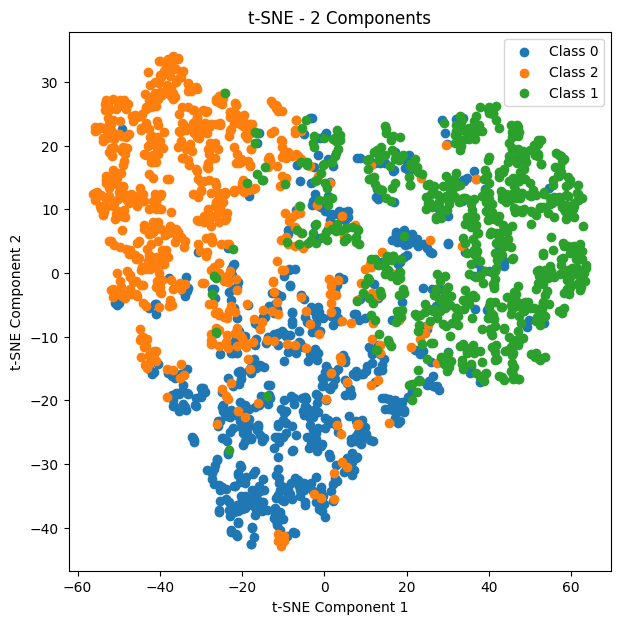

In [38]:
# 4) Similar to PCA, visualize two t-SNE components on a scatter plot.
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Apply t-SNE to reduce to 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(X)

# Convert to DataFrame for visualization
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y

# Scatter plot for t-SNE results
plt.figure(figsize=(7, 7))
for class_label in tsne_df['Class'].unique():
    subset = tsne_df[tsne_df['Class'] == class_label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=f'Class {class_label}')

# Labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.title('t-SNE - 2 Components')
plt.show()

# 5) Comparing PCA and t-SNE based on the visualization results
When comparing the results of PCA and t-SNE, the choice of technique depends on the patterns present in the data and the purpose of analysis. If t-SNE reveals more compact and distinct clusters compared to PCA, it suggests that the dataset contains non-linear relationships. This means that the inherent structure of the data is more complex, with patterns that PCA—a linear method—cannot fully capture. In this case, t-SNE becomes the preferred method for visualization and clustering tasks since it excels at revealing these non-linear groupings.

On the other hand, if both PCA and t-SNE plots look similar, it indicates that the data may be linearly separable, meaning that the primary variations within the dataset can be captured effectively through linear projections like PCA. This makes PCA not only sufficient but also more practical for dimensionality reduction, as it is computationally faster and preserves global structure better (e.g., distances between far-apart clusters have meaning).

Additionally, it’s important to note that t-SNE should primarily be used for visualization, as it can distort the global structure. Clusters that appear close to each other in a t-SNE plot may not have meaningful relationships in high-dimensional space. Meanwhile, PCA is better suited for tasks where dimensionality reduction is needed to improve model performance or reduce computation time in downstream applications, such as machine learning models.

Ultimately, the visualization comparison provides insights into the nature of the dataset:

If t-SNE performs better: The dataset contains non-linear patterns, and you may want to explore other non-linear methods (e.g., kernel PCA or UMAP) for deeper analysis.
If PCA works just as well: The dataset is linearly structured, and PCA may suffice both for feature reduction and exploration.
This comparison emphasizes how understanding the behavior of your dataset through both methods can guide you toward the most appropriate tools for analysis and visualization.